In [1]:
import pickle
import numpy as np
import networkx as nx
import pandas as pd
import brainmaptools as brainmap
import matplotlib.pyplot as plt
import community
import brainx.modularity as mod
import operator
%matplotlib inline
import csv
import scipy as scipy
import scipy.io as io
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import math as math
import pylab as pl
import My_functions as myfunctions
import progressbar as pb
import time
from collections import Counter
import random

/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/__init__.py:30: UserWarning: Monkeypatching NetworkX's Watts-Strogatz routine
  warnings.warn("Monkeypatching NetworkX's Watts-Strogatz routine")


In [2]:
domains= ['Memory', 'Working Memory', 'Emotion', 'Attention', 'Language', 'Vision', 'Audition', 'Base', 'Rest']

In [3]:
relabel_dict_file='/Users/owner/Functional_Connectivity/Scripts/Label_dict.pck'
relabel_dict=pickle.load(open(relabel_dict_file,"rb"))

In [4]:
G_nothresh={}
for x in domains:
    filename='G_nothresh_jaccard_'+x+'_.pck'
    workdir='/Users/owner/Functional_Connectivity/Results/G_jaccard_graphs/Unthresholded_G_jaccard/'
    output=workdir+filename
    G_nothresh[x]=pickle.load(open (output, 'rb'))

In [11]:
for x in domains:
    print x, np.mean(nx.clustering(G_nothresh[x]).values())

Memory 0.520527468546
Working Memory 0.556986320734
Emotion 0.452247424322
Attention 0.519972453593
Language 0.559028295104
Vision 0.500206593764
Audition 0.60149460035
Base 0.72498130137
Rest 0.548001916387


# Basic Metrics

In [5]:
basic_metrics={x: brainmap.run_weighted_metrics(G_nothresh[x], 12, comm=False) for x in domains}

Singificant Nodes in One Domain

In [6]:
significant_nodes, z_overall=myfunctions.significant_regions(basic_metrics, domains, 'between_cent', relabel_dict, 1.96)

Probabilistically Significant Betweeness Centrality Nodes

In [7]:
N={x: float(G_nothresh[x].number_of_nodes()) for x in domains}
P={}
spots=len(basic_metrics[x]['topbetween_cent'])
for x in domains:
    P[x]=(spots/N[x])*((spots-1)/(N[x]-1))*((spots-2)/(N[x]-2))*((spots-3)/(N[x]-3))*((spots-4)/(N[x]-4))*((spots-5)/(N[x]-5))*((spots-6)/(N[x]-6))*((spots-7)/(N[x]-7))*((spots-8)/(N[x]-8))*((spots-9)/(N[x]-9))*((spots-10)/(N[x]-10))*((spots-11)/(N[x]-11))
    #P[x]="{:.0%}".format(P[x])

In [8]:
P['Base']*P['Memory']*P['Working Memory']*P['Language']*P['Audition']*P['Attention']

3.9403841271985067e-115

In [9]:
top_freq=[(basic_metrics[x]['topbetween_cent']) for x in domains]

In [10]:
top_list=[item for sublist in top_freq for item in sublist]

In [11]:
for x in domains:
    for n in range(len(significant_nodes[x])):
        if significant_nodes[x][n][0] not in top_list:
            print significant_nodes[x][n][0], x

Rolandic_Oper_R_1 Rest


In [12]:
top_freq_dict=Counter(top_list)

In [13]:
sorted_top_freq=sorted(top_freq_dict.items(), key=operator.itemgetter(1), reverse=True)

In [14]:
degree_specialized_regions=[]
for part in range(len(sorted_top_freq)):
    for section in range(len(top_freq)):
        for x in domains:
            for n in range(len(significant_nodes[x])):
                if sorted_top_freq[part][0] == significant_nodes[x][n][0]:
                    if sorted_top_freq[part][1] < 2:
                        degree_specialized_regions.append(sorted_top_freq[part][0])
degree_specialized_regions=set(degree_specialized_regions)

In [15]:
between_specialized_regions=[]
for part in range(len(sorted_top_freq)):
    for section in range(len(top_freq)):
        for x in domains:
            for n in range(len(significant_nodes[x])):
                if sorted_top_freq[part][0] == significant_nodes[x][n][0]:
                    if sorted_top_freq[part][1] < 2:
                        between_specialized_regions.append((x,sorted_top_freq[part][0]))
between_specialized_regions=set(between_specialized_regions)

In [16]:
specialized_regions=[]
for region in degree_specialized_regions:
    for reg in between_specialized_regions:
        if region == reg:
            specialized_regions.append(region)

In [17]:
stable_regions=[]
for n in range(len(sorted_top_freq)):
    if sorted_top_freq[n][1] > 5:
        stable_regions.append(sorted_top_freq[n][0])

Centrality Fingerprints

In [18]:
metric_l=('between_cent','degree_cent','eigenvector_cent','degrees','ccoeff')

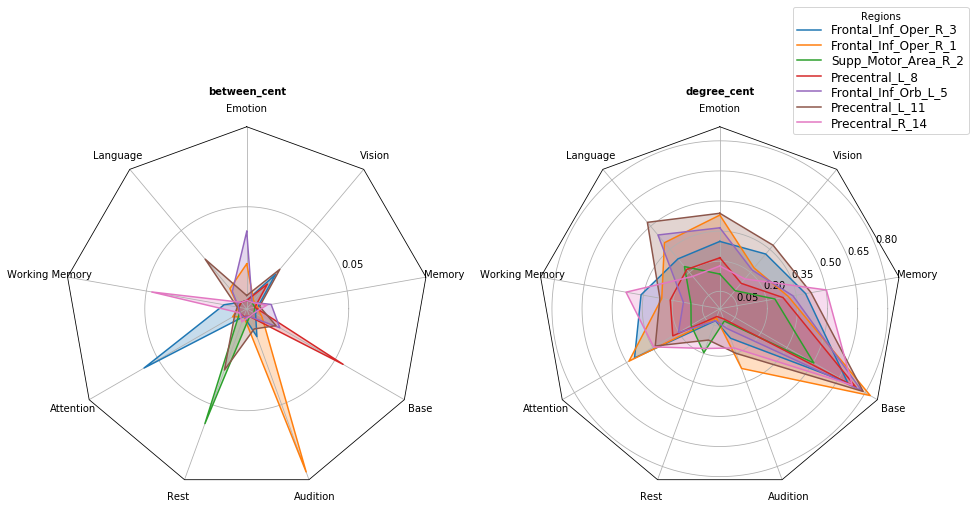

In [19]:
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

regionlist=['Frontal_Inf_Oper_R_3', 'Frontal_Inf_Oper_R_1', 'Supp_Motor_Area_R_2', 'Precentral_L_8', 'Frontal_Inf_Orb_L_5', 'Precentral_L_11', 'Precentral_R_14']
if __name__ == '__main__':
    N = 9
    theta = brainmap.radar_factory(N, frame='polygon')

    data = brainmap.make_fingerprint_data(regionlist, domains, basic_metrics, metric_l)
    spoke_labels = data.pop(0)

    fig, axes = plt.subplots(figsize=(15, 15), nrows=1, ncols=2,
                             subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.3, hspace=0.10, top=0.55, bottom=0.05)

    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
              'tab:pink', 'tab:gray', 'tab:cyan']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axes.flatten(), data):
        ax.set_rgrids(np.arange(0.05, 1.0, 0.15))
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.08),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)
        # add legend relative to top-left plot
    ax = axes[0]
    labels = (regionlist)
    legend = ax.legend(labels, loc=(2.0, .98),
                       labelspacing=0.2, title='Regions', fontsize='large')

    #fig.text(0.5, 0.55, 'Specialized Regions Across Domains',
             #horizontalalignment='center', color='black', weight='bold',
             #size='large')
    #fig.savefig('/Users/owner/Desktop/Special_Regions(Paper)(B).png')

    plt.show()